# Example Generation

Load data

In [1]:
import gen_util
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

fname = './test_images/20161209_C01_001.czi'
# fname = './test_images/20161219_C01_034.czi'
loader = gen_util.CziLoader(fname, channel_light=3, channel_nuclear=2)

before:
shape: (76, 1024, 1024) | dtype: uint16
min: 0 | max: 8897 | median 3979.0
shape: (76, 1024, 1024) | dtype: uint16
min: 0 | max: 374 | median 112.0
after:
shape: (76, 1024, 1024) | dtype: float64
min: -6.90969277323 | max: 8.71439406015 | median 0.0778582563302
shape: (76, 1024, 1024) | dtype: float64
min: -6.46402454974 | max: 14.8001756353 | median -0.0961357242739


(10, 397, 428)
(10, 645, 549)
(10, 514, 367)
(10, 725, 324)
(10, 409, 14)
(10, 823, 501)
x, y shapes: (6, 1, 32, 128, 128) (6, 1, 32, 128, 128)
16
(-4.3334833335825547, 7.806869157328312) (-3.7917854890518679, 7.806869157328312)


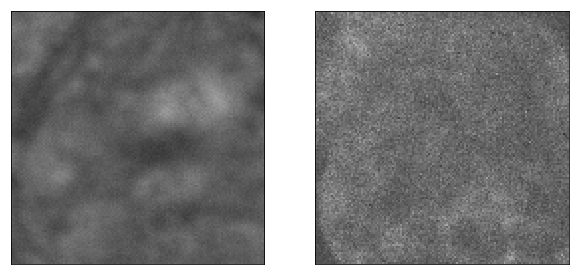

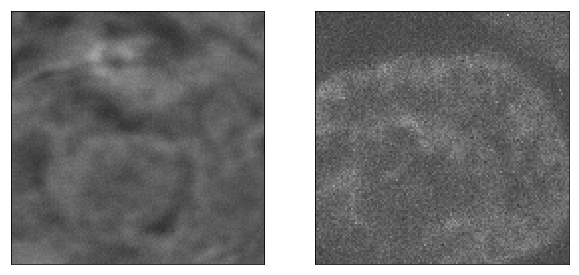

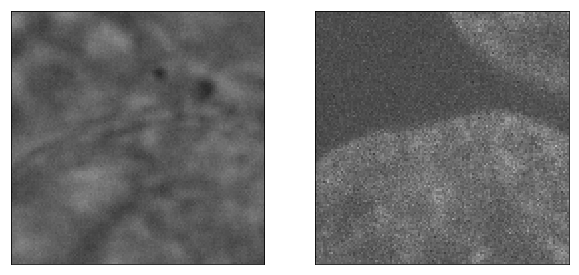

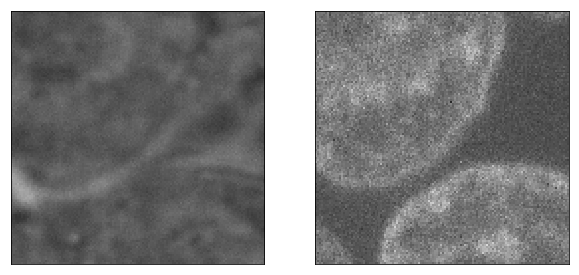

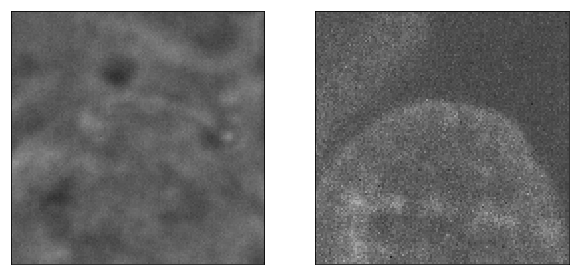

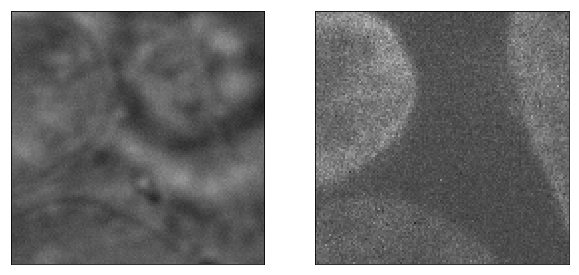

In [4]:
import aicsimage.processing as proc

batch_size = 6
dims_chunk = (32, 128, 128)
x, y = loader.get_batch(batch_size, dims_chunk=dims_chunk, dims_pin=(10, None, None))
print('x, y shapes:', x.shape, y.shape)

# colors = [[.3, .3, .3], [0,0,1]]
z_mid = dims_chunk[0]//2
print(z_mid)
x_min_max = (np.min(x), np.max(y))
y_min_max = (np.min(y), np.max(y))
print(x_min_max, y_min_max)
for i in range(batch_size):
    img_light = x[i][0, z_mid, ]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(121)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img_light, cmap='gray', vmin=x_min_max[0], vmax=x_min_max[1])

    img_nuc = y[i][0, z_mid, ]   
    ax = fig.add_subplot(122)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img_nuc, cmap='gray', vmin=y_min_max[0], vmax=y_min_max[1])

    plt.show()